In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
from os.path import join, split

data_path = (join(
    split(os.getcwd())[0],'data'))

In [2]:
movies = pd.read_csv(
  join(data_path, 'ml-1m', 'movies.dat'),
  sep='%',
  encoding='latin-1',
  header=None,
  names=['MovieID', 'Title', 'Genres'])

## What are the possible ratings?

In [3]:
ratings = pd.read_csv(
  join(data_path, 'ml-1m', 'ratings.dat'),
  sep='%',
  header=None,
  names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

ratings['Rating'].unique()

array([5, 3, 4, 2, 1])

## What are the movie genres?

In [4]:
all_genres_unrolled = movies['Genres'].str.split('|', expand=True)

all_genres = set().union(*(all_genres_unrolled[col].unique() for col in all_genres_unrolled.columns))
all_genres = {genre for genre in all_genres if genre}
print('There are', len(all_genres), 'genres:')
for genre in all_genres:
  print(genre)

There are 18 genres:
Comedy
Romance
Film-Noir
Documentary
Western
Adventure
Animation
Drama
Thriller
Crime
Action
Sci-Fi
Horror
Mystery
Fantasy
Musical
War
Children's


## Some basic statistics

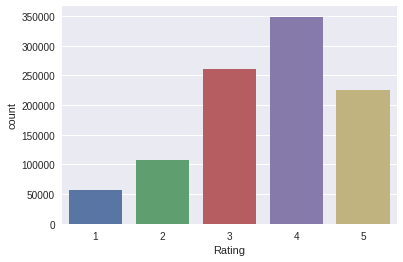

Mean rating:  3.581564453029317


In [5]:
sns.countplot(x='Rating', data=ratings)
plt.show()
print('Mean rating: ', ratings['Rating'].mean())

## Ratings per user

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: UserID, dtype: float64


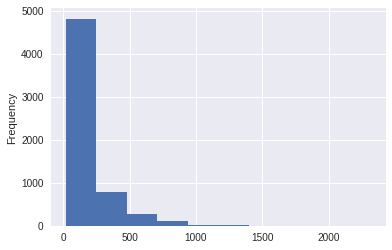

In [6]:
ratings_per_user = ratings['UserID'].value_counts()
ratings_per_user.plot.hist()
print(ratings_per_user.describe())

## Ratings per movie

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: MovieID, dtype: float64


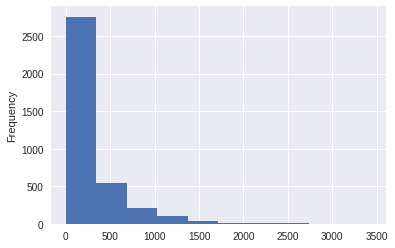

In [7]:
ratings_per_movie = ratings['MovieID'].value_counts()
#sns.distplot(
#  a=ratings_per_movie,
#  kde=False)
#plt.show()
ratings_per_movie.plot.hist()
print(ratings_per_movie.describe())

## Search movies by substring of title

In [8]:
contains_searched = movies['Title'].str.contains('Pulp')
movies[contains_searched]['Title']

293    Pulp Fiction (1994)
Name: Title, dtype: object